# **Entropy-based assessment of clusters**

This code is taken from an introduction to unsupervised learning with **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

The elbow method implemented in lab 1 and 2 is a great test of figuring out the optimal value of clusters to create.

Entropy-based tests, like the **homogeneity score** can be used in supervised clustering problems. 
The homogeneity score estimates how many of the predicted clusters contain only members of a single class. The higher the core is the better the clustering.

Homogeneity is computed based on the conditional entropy H(y_true|y_pred), which measures the uncertainty in the determining the right class after having the clustered dataset:

![alt text](/home/homogeneity_score.png)

 To explore the homogeneity test, we will assume that we know the ground truth clustering (y_true) for the given data set, and compare it to the predicted clusters for different values of K.

In [1]:
# Import packages
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import homogeneity_score
%matplotlib inline

**1. Read in the data**

In [2]:
df = pd.read_csv('UnsupervisedLearning/clustering_test.csv')

#TODO: Write code to inspect the first five rows of the data frame
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


**2. Use the MinMax scaler to fit the data**

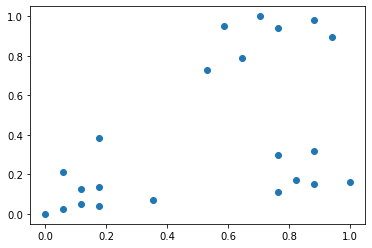

In [3]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

plt.scatter(df.Age,df['Income($)'])

**3.A. Elbow method: compute the sum of squared error for different values of k**

In [4]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

**Plot SSE for different values of K to find the optimal K**

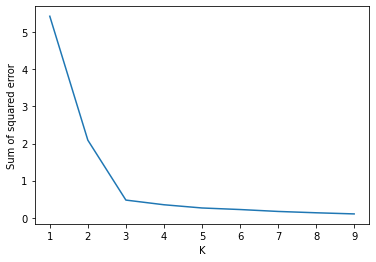

In [5]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

**3.B. Use the homogeneity score on different values of K**

In [6]:
y_true = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]
homogeneityscore = []
completenessScore = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    y_predicted = km.fit_predict(df[['Age','Income($)']])
    homogeneityscore.append(homogeneity_score(y_true, y_predicted))


**Plot homogeneity score for different values of K to find the optimal K**

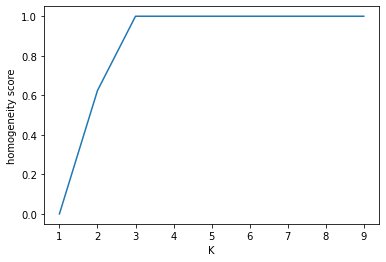

In [7]:
plt.xlabel('K')
plt.ylabel('homogeneity score')
plt.plot(k_rng, homogeneityscore)

**4. Use KMeans to create 3 clusters**

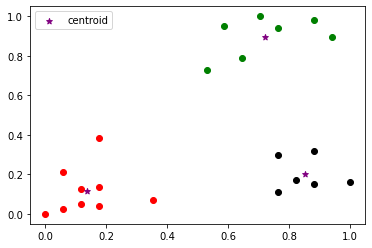

In [8]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

**5. Earn Your Wings: DO it yourself**

Test this algorithm on your own data set. Note that this will require a ground truth for the clustering, as shown in step 3.B. 